# Homework 1 土木4B 109612054 吳巽言

Q : Formulate a weighted k-NN algorithm for a REGRESSION problem based on a weighted average of its k-nearest neighbors, using the inverse of the Euclidean distance as the weight.

# ANS
The main difference between classification and regression is that regression is used for predicting "continuous" values.

So for regression KNN model, we return weighted mean of the K neighbors as the final result.


If the distance between that point and its neighbor is 0, it means they're identical. So we simply predict it the same as its neighbor

# KNN - Regression


## Generate sample data

reference : https://scikit-learn.org/stable/auto_examples/neighbors/plot_regression.html#sphx-glr-auto-examples-neighbors-plot-regression-py

In [ ]:
import numpy as np

np.random.seed(0) # 固定random seed以便重現
X_regression_train = np.sort(5 * np.random.rand(40, 1), axis=0)
y_regression_train = np.sin(X_regression_train).ravel() # 正弦函數值使用 ravel() 轉換成一維數組
X_regression_test = np.linspace(0, 5, 500)[:, np.newaxis]
y_regression_test = np.sin(X_regression_test).ravel()

# Add noise to targets
y_regression_train[::5] += 1 * (0.5 - np.random.rand(8))

## Training and predicting

### 自己寫 Regression model algorithmn ?

In [ ]:
def KNN_regressor(X_train, y_train, X_test, k):

    y_pred = []

    for x_test in X_test:
        # 計算預知點與所有點的歐基里德距離
        distances = [np.linalg.norm(x_test - x_train) for x_train in X_train]
        # 把距離依大小排序，並回傳原順序對應的大小排序編號，找出前K近的點
        sortindex = np.argsort(distances)[:k]

        # 前k項的加權平均
        weighted_sum, sum_of_weights = 0, 0
        for index in sortindex:
            # 權重 = 1/distance，若距離=0則識為identical，因此改將距離=1使權重=1
            weight = 1 / distances[index] if distances[index] != 0 else 1
            weighted_sum += weight * y_train[index]
            sum_of_weights += weight

        if sum_of_weights != 0:
            # 周遭K點的加權平均即為預測結果
            y_pred.append(weighted_sum / sum_of_weights)
        else:
            y_pred.append(None)

    return np.array(y_pred)

y_regression1_pred = KNN_regressor(X_regression_train, y_regression_train, X_regression_test, k)
print ("Print results for first 20 test data points:")
print ("Predicted labels:\n", y_regression1_pred[20:40])
print ("Ground truth    :\n", y_regression_test[20:40])


Print results for first 20 test data points:
Predicted labels:
 [0.2107693  0.21659801 0.22267958 0.22904427 0.23572266 0.24274659
 0.25015007 0.30539707 0.31248598 0.31915606 0.32539345 0.33116646
 0.33641444 0.34102563 0.34478922 0.35505644 0.35734893 0.37263323
 0.38560181 0.39653362]
Ground truth    :
 [0.19906213 0.20887148 0.21865986 0.22842628 0.23816978 0.24788936
 0.25758405 0.26725288 0.27689487 0.28650907 0.2960945  0.30565021
 0.31517522 0.3246686  0.33412937 0.3435566  0.35294934 0.36230664
 0.37162756 0.38091117]


### sklearn_KNeighborsRegressor

reference : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html


```
class sklearn.neighbors.KNeighborsRegressor(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)[source]
```
**weights**
‘distance’ : *weight points by the inverse of their distance*.

**metric**
Metric to use for distance computation. Default is “minkowski”, *which results in the standard Euclidean distance when p = 2*.

In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

k = 3
clf = KNeighborsRegressor(n_neighbors = k, weights='distance', p = 2) # metric預設是Minkowski，p=2時就等於Euclidean distance
clf.fit(X_regression_train, y_regression_train)
y_regression2_pred = clf.predict(X_regression_test)

print ("Print results for first 20 test data points:")
print ("Predicted labels:\n", y_regression2_pred[20:40])
print ("Ground truth    :\n", y_regression_test[20:40])

Print results for first 20 test data points:
Predicted labels:
 [0.2107693  0.21659801 0.22267958 0.22904427 0.23572266 0.24274659
 0.25015007 0.30539707 0.31248598 0.31915606 0.32539345 0.33116646
 0.33641444 0.34102563 0.34478922 0.35505644 0.35734893 0.37263323
 0.38560181 0.39653362]
Ground truth    :
 [0.19906213 0.20887148 0.21865986 0.22842628 0.23816978 0.24788936
 0.25758405 0.26725288 0.27689487 0.28650907 0.2960945  0.30565021
 0.31517522 0.3246686  0.33412937 0.3435566  0.35294934 0.36230664
 0.37162756 0.38091117]


## Evaluation

當您使用回歸模型時，通常不使用"accuracy"作為評估指標，因為回歸模型的輸出是連續值而不是類別標籤。相反，您應該使用回歸模型的評估指標，例如均方誤差（Mean Squared Error，MSE）或R平方（R-squared）等來評估模型的性能。 by chat-GPT

這邊用Mean Squared Error
MSE = 1 / N * sum for i to N (y_i – yhat_i)^2

Mean Squared Error (MSE) for sklearn model: 0.00595 

Mean Squared Error (MSE) for my own model : 0.00595 



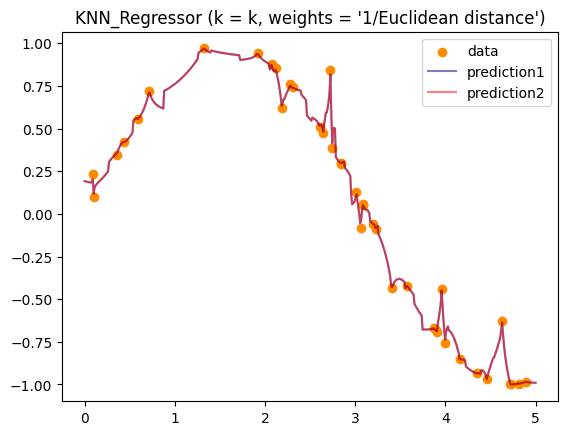

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

mse1 = mean_squared_error(y_regression_test, y_regression1_pred)
mse2 = mean_squared_error(y_regression_test, y_regression2_pred)

plt.scatter(X_regression_train, y_regression_train, color="darkorange", label="data")
plt.plot(X_regression_test, y_regression1_pred, color="navy", alpha = 0.5, label="prediction1")
plt.plot(X_regression_test, y_regression2_pred, color="red", alpha = 0.5, label="prediction2")
plt.legend()
plt.title("KNN_Regressor (k = k, weights = '1/Euclidean distance')")
print(f"Mean Squared Error (MSE) for sklearn model: {mse1:.5f} \n")
print(f"Mean Squared Error (MSE) for my own model : {mse2:.5f} \n")
plt.show()

# KNN - Classification



## import dataset Iris

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
import numpy as np

iris_X = iris.data
iris_y = iris.target
print('Number of classes: %d' %len(np.unique(iris_y)))   #用 np.unique() 移除重複數字後排序可以看到target分三類
print('Number of data points: %d' %len(iris_y))

print ('\nSamples from class 0:\n', iris_X[iris_y == 0,:][:5,:])
print ('\nSamples from class 1:\n', iris_X[iris_y == 1,:][:5,:])
print ('\nSamples from class 2:\n',iris_X[iris_y == 2,:][:5,:])

Number of classes: 3
Number of data points: 150

Samples from class 0:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Samples from class 1:
 [[7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [5.5 2.3 4.  1.3]
 [6.5 2.8 4.6 1.5]]

Samples from class 2:
 [[6.3 3.3 6.  2.5]
 [5.8 2.7 5.1 1.9]
 [7.1 3.  5.9 2.1]
 [6.3 2.9 5.6 1.8]
 [6.5 3.  5.8 2.2]]


## Split training and test sets
Suppose we want to use 50 data points for the test set and the remaining 100 data points for the training set.

Scikit-learn has a function that allows us to randomly select these points, as follows:

reference : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
from sklearn.model_selection import train_test_split

X_classification_train, X_classification_test, y_classification_train, y_classification_test = train_test_split(iris_X, iris_y, test_size=50)

print ("Training size: %d" %len(y_classification_train))
print ("Test size    : %d" %len(y_classification_test))

Training size: 100
Test size    : 50


## Training and predicitng

reference : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


```
class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)[source]
```
datasets剛剛分成 X_train, X_test, y_train, y_test，**這邊測試模型（分類器/回歸器）得到 y_pred**

training data : X_train 對到正確答案 y_train

X_test  對到 ground truth : y_test

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors = 1, p = 2) # K=1, p=distance
clf.fit(X_classification_train, y_classification_train)      # for training
y_classification_pred = clf.predict(X_classification_test)   # for prediction

print ("Print results for first 20 test data points:")
print ("Predicted labels: ", y_classification_pred[20:40])  # 預測結果
print ("Ground truth    : ", y_classification_test[20:40])  # 實際的分類

Print results for first 20 test data points:
Predicted labels:  [2 2 2 1 1 0 1 0 2 2 1 2 1 2 0 0 1 0 1 0]
Ground truth    :  [2 2 2 1 1 0 1 0 2 2 1 2 1 2 0 0 1 0 1 0]


## Evaluation
To evaluate the accuracy, we see how many points in the test data are predicted correctly.
This number divided by the total number in the test data set will give us the accuracy. Scikit-learn provides the accuracy_score function to carry out this task.

In [ ]:
from sklearn.metrics import accuracy_score

print ("\n Classification - 1NN (uniform weights) \n    Accuracy : %.2f %%" %(100*accuracy_score(y_classification_test, y_classification_pred)))


 Classification - 1NN (uniform weights) 
    Accuracy : 96.00 %


# OTHER ( 跟作業無關 )

#### Other method of assigning weight

In [ ]:
def myweight(distances):
    sigma2 = .5
    return np.eXp(-distances**2/sigma2)

clf = KNeighborsClassifier(n_neighbors = 10, p = 2, weights = myweight)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print ("Accuracy of 10NN (customized weights): %.2f %%" %(100*accuracy_score(y_test, y_pred)))

NameError: ignored

##下面那段越語

在這種情況下，結果等同於主要投票技術。為了更準確地評估不同 K 值下 KNN 的結果，以及不同距離度量和權重定義的方法，我們需要使用多種不同的訓練和測試數據分割方式來進行評估，然後取平均值。因為在特定情況下，數據的分割可能非常好或非常差（有偏差）。這也是評估特定算法性能時經常使用的方法。

簡而言之，這段文字講述了在評估 KNN 時，需要使用不同的分割數據集、不同的距離度量和權重設置，以確保評估的結果更具可信度。通常，這些評估的結果將被平均，以獲得更全面的性能評估。


*   KNN 用於回歸問題

對於回歸問題，我們也可以使用類似的方法：根據鄰居的輸出值和它們到目標的距離來估計輸出值。這取決於您的問題，您可以自行定義如何依賴這些值。

<div class="imgcap">
<img src ="/public/knn/knnR.png" align = "center">
<div class="thecap"> KNN cho bài toán Regression  (Nguồn: <a href = "http://scikit-learn.org/stable/auto_examples/neighbors/plot_regression.html#sphx-glr-auto-examples-neighbors-plot-regression-py">Nearest Neighbors regression</a>) <br></div>
</div>

*   數據標準化
當數據中的某個特徵（或向量中的元素）遠大於其他特徵（例如，使用毫米而不是厘米測量結果）時，各點之間的距離將高度依賴於該特徵。為了獲得更準確的結果，通常使用數據標準化技術，將不同單位的特徵縮放到相同的值範圍內，通常是從0到1，然後再進行KNN。有許多不同的標準化技術，您將在後續的博客文章中了解到。這些標準化技術不僅適用於KNN，還適用於大多數其他算法。

使用不同的距離度量
除了本文介紹的norm 1和norm 2之外，還有許多其他不同的距離度量可以使用。一個簡單的例子是計算兩個數據點之間的不同特徵的數量。這個數量越小，兩個數據點越接近。這實際上就是我們所謂的0-norm。

*   KNN的優點
訓練過程的計算複雜度為0。
對新數據的預測非常簡單。
不需要對類別的分佈做任何假設。
*   KNN的缺點
當K較小時，KNN對噪音非常敏感。
正如我們所說的，KNN是一個在測試階段進行大量計算的算法，其中計算到每個訓練數據點的距離會花費大量時間，特別是在具有大量特徵和數據點的數據庫中。K越大，計算的複雜性也越高。此外，將所有數據存儲在內存中也會影響KNN的性能。

## Try it yourself - MNIST Dataset

手寫數字圖像分類問題，最有名的資料集是 MNIST 資料集 (MNIST Dataset)，MNIST 中包含了上萬張的手寫數字圖像以及每一張圖像正確的標籤 (Label)。

MNIST 是 Modified National Institute of Standards and Technology database 的縮寫，其為 NIST 機構所建立的兩個資料集的修改版本。

In [ ]:
!pip install python-mnist

In [ ]:
# %reset
"""
from __future__ import division
import numpy as np
from mnist import MNIST
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.metrics import accuracy_score

import time

# you need to download the MNIST dataset first
# at: http://yann.lecun.com/exdb/mnist/
mndata = MNIST('../MNIST/') # path to your MNIST folder
mndata.load_testing()
mndata.load_training()
X_test = mndata.test_images
X_train = mndata.train_images
y_test = np.asarray(mndata.test_labels)
y_train = np.asarray(mndata.train_labels)

# uncomment then run
start_time = time.time()
clf = neighbors.KNeighborsClassifier(n_neighbors = 1, p = 2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
end_time = time.time()
print("Accuracy of 1NN for MNISST: %.2f %%" %(100*accuracy_score(y_test, y_pred)))
print("Running time: %.2f (s)" % (end_time - start_time))
"""